In [1]:
from __future__ import print_function

import numpy as np
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import scipy.optimize

from mpl_toolkits.mplot3d import Axes3D

plt.style.use('classic')
mpl.rcParams['axes.xmargin'] = 0.0
mpl.rcParams['axes.ymargin'] = 0.0

%matplotlib notebook

In [2]:
data = np.genfromtxt ('ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2:]

<IPython.core.display.Javascript object>


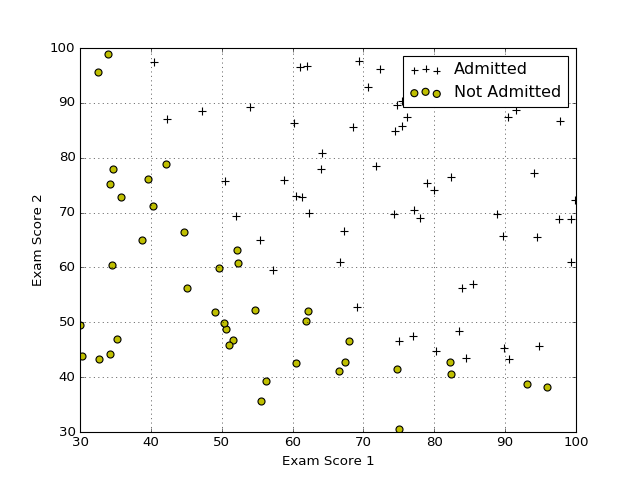

In [3]:
def plotData (X, y):
    plt.figure ()
    plt.scatter (X[y.T[0]==1, 0].T, X[y.T[0]==1, 1].T, marker='+', s=40, 
                 color='k', lw=1)
    plt.scatter (X[y.T[0]==0, 0].T, X[y.T[0]==0, 1].T, marker='o', 
                 color='y', s=40, edgecolors='k', lw=1)

    plt.grid ()
    
plotData (X, y)
plt.xlim (30, 100)
plt.ylim (30, 100)
plt.xlabel ('Exam Score 1')
plt.ylabel ('Exam Score 2')
plt.legend (labels=['Admitted', 'Not Admitted'])    

In [4]:
m, n = X.shape
X = np.hstack((np.ones ((m, 1)), X))
initial_theta = np.zeros (n + 1)

In [5]:
def sigmoid (z):
    return (1. / (1. + np.exp (-z)))
    
def gradient (theta, X, y):
    m = len (y)
    theta = theta.reshape((n + 1, 1))
    h_theta = sigmoid (X.dot (theta))
    grad = 1./m * (h_theta - y).T.dot (X)
    return (grad.flatten ())

def costFunction (theta, X, y):
    m = len (y)
    theta = theta.reshape((n + 1, 1))
    h_theta = sigmoid (X.dot (theta))
    J = -1./m * (y.T.dot (np.log (h_theta)) + 
                 (1 - y).T.dot (np.log (1 - h_theta)))
    
    return (J)

In [6]:
cost = costFunction (initial_theta, X, y)
grad = gradient (initial_theta, X, y)

print ('Cost at initial theta (zeros): {}'.format (cost[0][0]))
print ('Gradient at initial theta (zeros):')
print (grad)

Cost at initial theta (zeros): 0.69314718056
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]


In [7]:
result = scipy.optimize.minimize (fun=costFunction, x0=initial_theta, 
                                 args=(X, y), method='BFGS', 
                                 jac=gradient)

theta = result.x
cost = result.fun

In [8]:
def mapFeature (X1, X2):
    degree = 6
    out = np.ones ((X1.shape[0], 1))
    
    for i in range (1, degree+1):
        for j in range (i+1):
            out = np.hstack ((out, X1**(i-j) * X2**j))
            
    return (out)

def plotDecisionBoundary (theta, X, y):
    plotData (X[:, 1:], y)
    
    if X.shape[1] <= 3:
        plot_x = np.array ([X[:, 2].min () - 2, X[:, 2].max () + 2])
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        plt.plot (plot_x, plot_y, label='Decision Boundary')
    else:
        u = np.linspace (-1, 1.5, 50)
        v = np.linspace (-1, 1.5, 50)
        z = np.zeros ((len (u), len (v)))
        
        for i in range (len (u)):
            for j in range (len (v)):
                z[i, j] = np.sum (mapFeature (
                    np.array ([[u[i]]]), np.array ([[v[j]]])).flatten () * \
                    theta)
                    
        u_grid, v_grid = np.meshgrid (u, v, indexing='ij')
        plt.contour (u_grid, v_grid, z, levels=[0], lw=2)

<IPython.core.display.Javascript object>


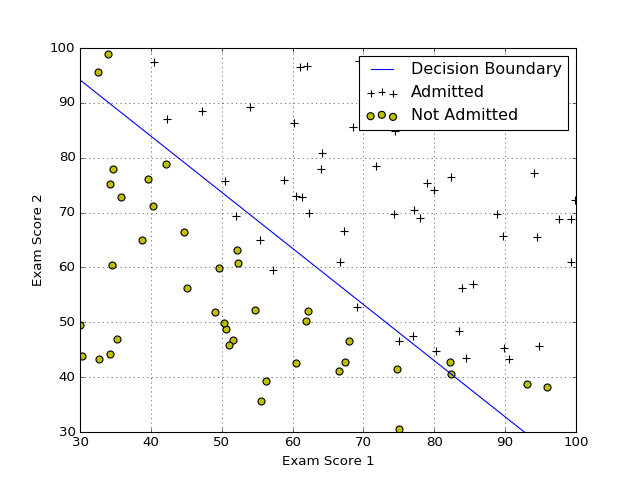

In [9]:
plotDecisionBoundary (theta, X, y)
plt.xlim (30, 100)
plt.ylim (30, 100)
plt.xlabel ('Exam Score 1')
plt.ylabel ('Exam Score 2')
plt.legend (labels=['Decision Boundary', 'Admitted', 'Not Admitted'])

In [10]:
prob = sigmoid ((np.array ([1, 45, 85]) * theta).sum ())
print ('For a student with scores 45 and 85, we predict and admission',
       'probability of {0:.4f}'.format (prob))

For a student with scores 45 and 85, we predict and admission probability of 0.7763


In [11]:
def predict (theta, X):
    theta = theta.reshape ((n+1, 1))
    p = sigmoid (X.dot (theta))
    p[p >= 0.5] = 1
    p[p < 0.5] = 0
    
    return (p)

In [12]:
p = predict (theta, X)
print ('Training Accuracy: {0:.2f}%'.format (100 / len (y) * (p == y).sum ()))

Training Accuracy: 89.00%


<IPython.core.display.Javascript object>


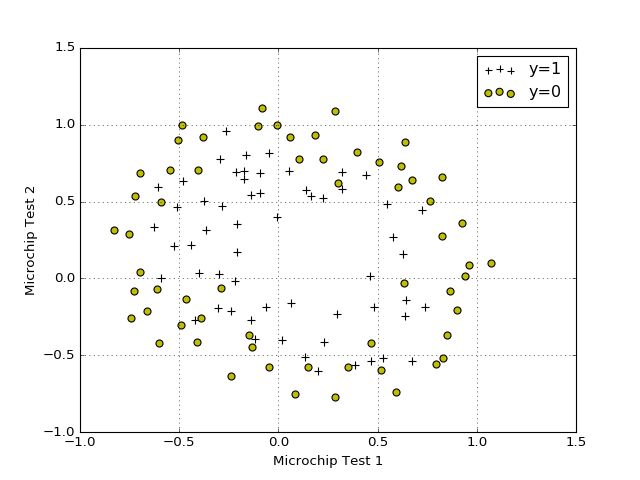

In [13]:
data = np.genfromtxt ('ex2data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2:]

plotData (X, y)
plt.xlabel ('Microchip Test 1')
plt.ylabel ('Microchip Test 2')
plt.legend (labels=['y=1', 'y=0'])

In [14]:
X = mapFeature (X[:, 0:1], X[:, 1:2])

n = X.shape[1] - 1 # Account for ones in zero column
m = len (y)

initial_theta = np.zeros (n + 1)
lambda_reg = 1

In [15]:
def gradientReg (theta, X, y, lambda_reg):
    m = len (y)
    theta = theta.reshape((X.shape[1], 1))
    h_theta = sigmoid (X.dot (theta))
    grad = 1./m * (h_theta - y).T.dot (X)
    grad[:, 1:] += lambda_reg/m * theta.T[:, 1:]
    return (grad.flatten ())

def costFunctionReg (theta, X, y, lambda_reg):
    m = len (y)
    theta = theta.reshape((X.shape[1], 1))
    h_theta = sigmoid (X.dot (theta))
    J = -1./m * (y.T.dot (np.log (h_theta)) + 
                 (1 - y).T.dot (np.log (1 - h_theta))) + \
            lambda_reg/(2.*m) * theta.T.dot (theta)
        
    return (J)

In [16]:
cost = costFunctionReg (initial_theta, X, y, lambda_reg)
print ('Cost at initial theta (zeros): {0}'.format (cost[0][0]))

Cost at initial theta (zeros): 0.69314718056


In [17]:
initial_theta = np.zeros (n + 1)
lambda_reg = 1.

result = scipy.optimize.minimize (fun=costFunctionReg, x0=initial_theta, 
                                  args=(X, y, lambda_reg), method='BFGS', 
                                  jac=gradientReg, 
                                  options=dict(maxiter=400, disp=True))
theta = result.x
cost = result.fun

p = predict (theta, X)
print ('Train Accuracy: {0:.2f}'.format (100. / len (y) * (p == y).sum ()))

         Current function value: 0.535591
         Iterations: 25
         Function evaluations: 124
         Gradient evaluations: 112
Train Accuracy: 83.05


<IPython.core.display.Javascript object>


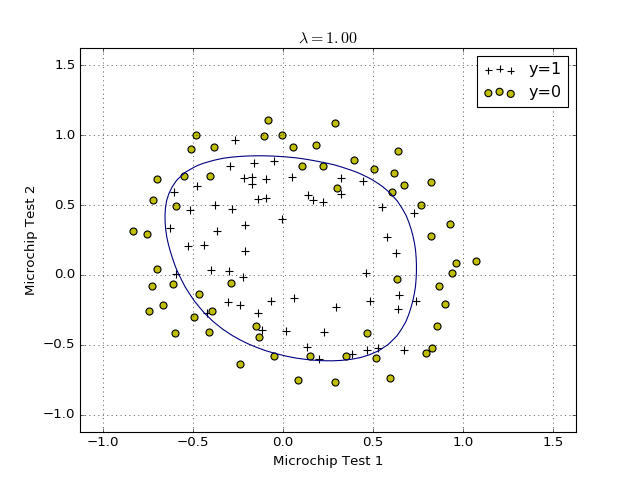

In [18]:
plotDecisionBoundary (theta, X, y)
plt.xlabel ('Microchip Test 1')
plt.ylabel ('Microchip Test 2')
plt.legend (labels=['y=1', 'y=0'])
plt.title (r'$\lambda = {0:.2f}$'.format (lambda_reg))

In [19]:
initial_theta = np.zeros (n + 1)
lambda_reg = 100.

result = scipy.optimize.minimize (fun=costFunctionReg, x0=initial_theta, 
                                  args=(X, y, lambda_reg), method='BFGS', 
                                  jac=gradientReg, 
                                  options=dict(maxiter=400, disp=True))
theta = result.x
cost = result.fun

p = predict (theta, X)
print ('Train Accuracy: {0:.2f}'.format (100. / len (y) * (p == y).sum ()))

         Current function value: 0.686538
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
Train Accuracy: 61.02


<IPython.core.display.Javascript object>


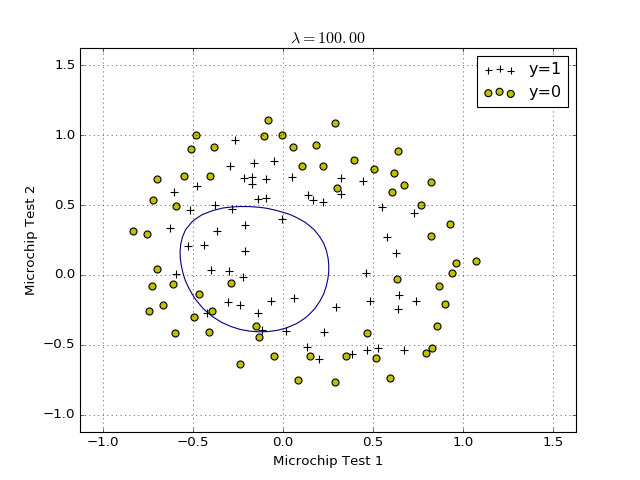

In [20]:
plotDecisionBoundary (theta, X, y)
plt.xlabel ('Microchip Test 1')
plt.ylabel ('Microchip Test 2')
plt.legend (labels=['y=1', 'y=0'])
plt.title (r'$\lambda = {0:.2f}$'.format (lambda_reg))

In [21]:
initial_theta = np.zeros (n + 1)
lambda_reg = 0.

result = scipy.optimize.minimize (fun=costFunctionReg, x0=initial_theta, 
                                  args=(X, y, lambda_reg), method='BFGS', 
                                  jac=gradientReg, 
                                  options=dict(maxiter=1000, disp=True))
theta = result.x
cost = result.fun

p = predict (theta, X)
print ('Train Accuracy: {0:.2f}'.format (100. / len (y) * (p == y).sum ()))

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547
Train Accuracy: 91.53


<IPython.core.display.Javascript object>


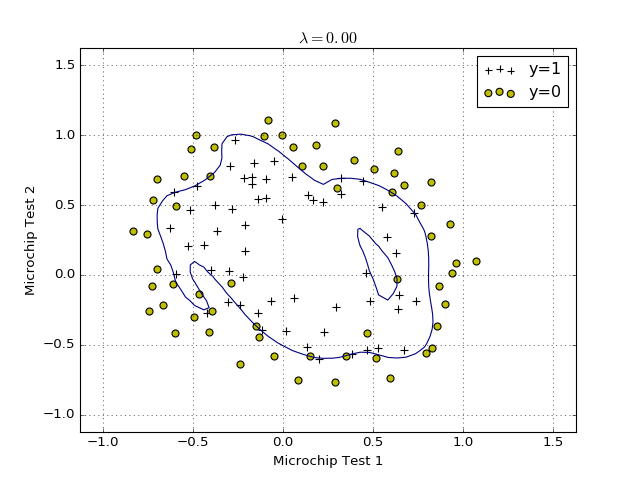

In [22]:
plotDecisionBoundary (theta, X, y)
plt.xlabel ('Microchip Test 1')
plt.ylabel ('Microchip Test 2')
plt.legend (labels=['y=1', 'y=0'])
plt.title (r'$\lambda = {0:.2f}$'.format (lambda_reg))